In [1]:
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

In [2]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv(r"/content/Train_Data.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


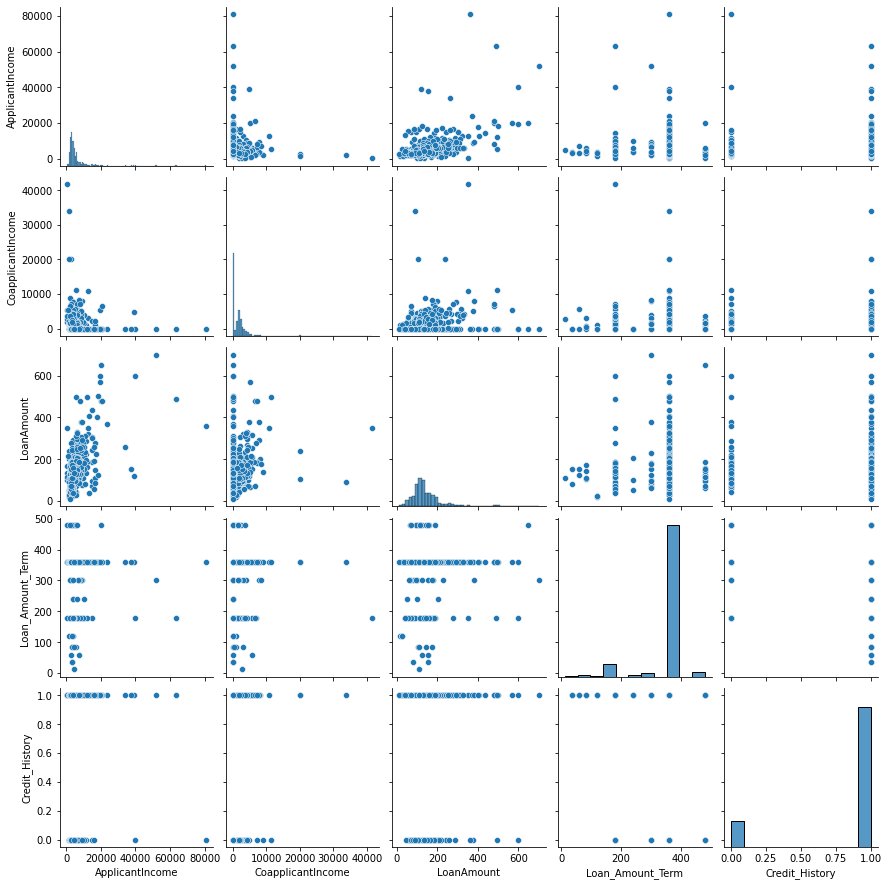

In [6]:
sns.pairplot(data)
plt.show()

In [7]:

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
fig = px.scatter_matrix(data["ApplicantIncome"])
fig.update_layout(width=700,height=400)
fig.show()

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

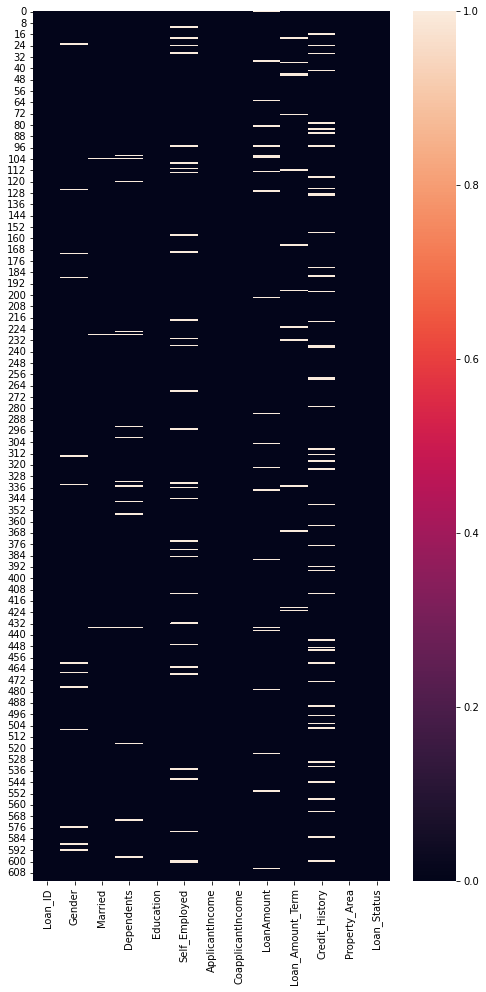

In [11]:
plt.figure(figsize=(8,16))
sns.heatmap(data.isnull())

In [12]:
print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  146.41216216216216

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [nan]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  85.51500809120331


In [13]:
plt.figure(figsize=(10,5))
fig = px.bar(data,x=data["Gender"])
fig.show()

fig = px.bar(data,x=data["Married"])
fig.show()

fig = px.bar(data,x=data["Education"],color="Education")
fig.show()

fig = px.bar(data,x=data["Self_Employed"])
fig.show()

fig = px.bar(data,x=data["Dependents"])
fig.show()

fig = px.bar(data,x=data["Property_Area"])
fig.show()

fig = px.bar(data,x=data["Loan_Status"],color="Loan_Status")
fig.show()

<Figure size 720x360 with 0 Axes>

In [14]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


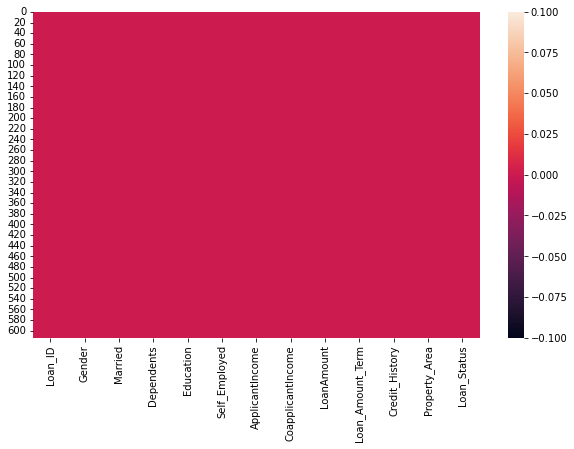

In [15]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [16]:
#Treating outliers and Converting data to Normal Distribution
#Before removing outlier

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

####################################################################################################
#Getting log value :->

data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])
####################################################################################################

print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  84.03871423798937


---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  [7.82404601]
CoapplicantIncome:  [0.]
LoanAmount:  [4.85203026]

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521023
CoapplicantIncome:  3.8725225987499248
LoanAmount:  0.49559166063018034


<Figure size 720x288 with 0 Axes>